In [30]:
# data analysis
import pandas as pd
import numpy as np

# visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
import sklearn
from sklearn.metrics import mean_absolute_error




### Reading the data from the dataset

In [5]:
#reading the data from the dataset
myData = pd.read_csv("student-mat.csv", sep=";")
myData.describe

<bound method NDFrame.describe of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel f

### Heatmap and Correletion matrix

In [3]:
#creating the Correlation matrix
correlation = myData.corr()
myData.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


<AxesSubplot:>

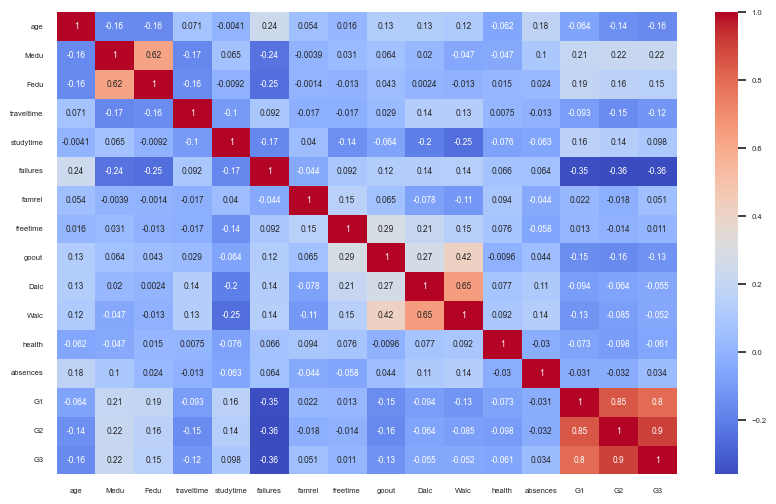

In [4]:
#Displaying the heatmap
plt.figure(figsize=(10, 6), facecolor='w', edgecolor='k')
sns.set(font_scale=0.5)
sns.heatmap(correlation, cmap="coolwarm", annot=True)

### Box plots

In [5]:
#creating a pivot table
myData.pivot(columns = 'studytime', values = 'G3')

studytime,1,2,3,4
0,NaN,6.0,NaN,NaN
1,NaN,6.0,NaN,NaN
2,NaN,10.0,NaN,NaN
3,NaN,NaN,15.0,NaN
4,NaN,10.0,NaN,NaN
...,...,...,...,...
390,NaN,9.0,NaN,NaN
391,16.0,NaN,NaN,NaN
392,7.0,NaN,NaN,NaN
393,10.0,NaN,NaN,NaN


<AxesSubplot:>

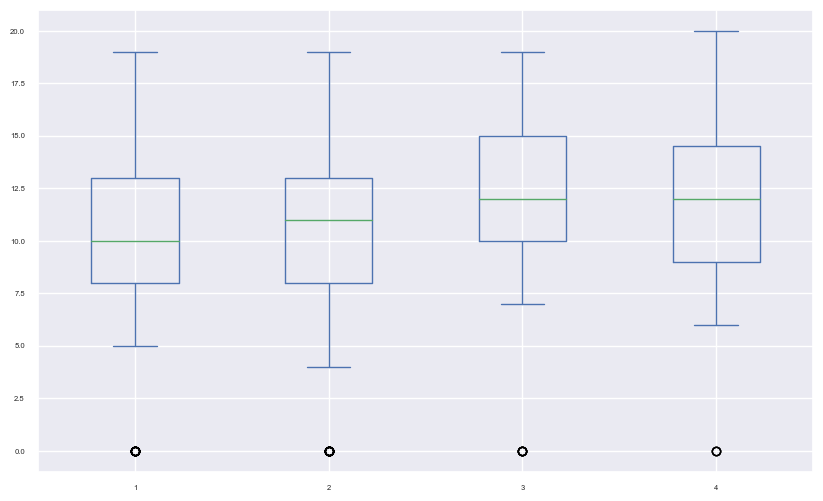

In [6]:
#Displaying a boxplot with the categorical feature, studytime and the continuous feature, G3
myData.pivot(columns = 'studytime', values = 'G3').plot(kind = 'box', figsize=(10,6))

### Feature Independence plots

array([<AxesSubplot:title={'center':'absences'}>], dtype=object)

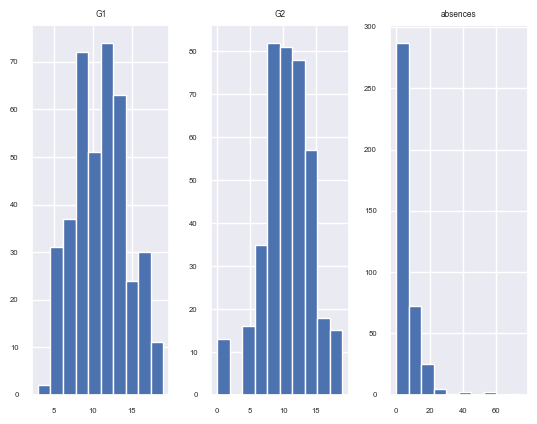

In [7]:
#Displaying plots for the features that are going to be used 
fig, axes = plt.subplots(1,3)
myData.hist('G1', ax=axes[0])
myData.hist('G2', ax=axes[1])
myData.hist('absences', ax=axes[2])

### Outlier plots

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='absences', ylabel='G3'>

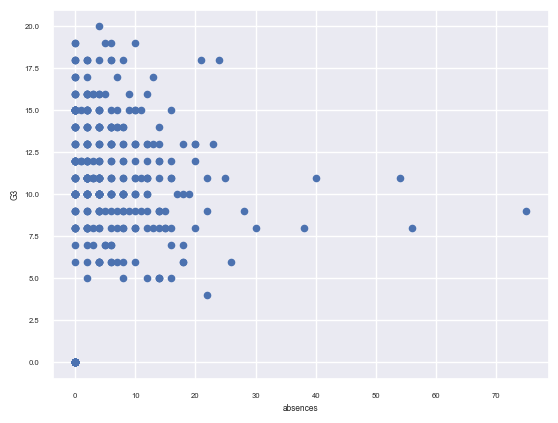

In [8]:
#Displaying a scatter plot 
myData.plot(kind='scatter', x='absences', y='G3')

### Illustration of Patterns of Interest

<AxesSubplot:ylabel='Frequency'>

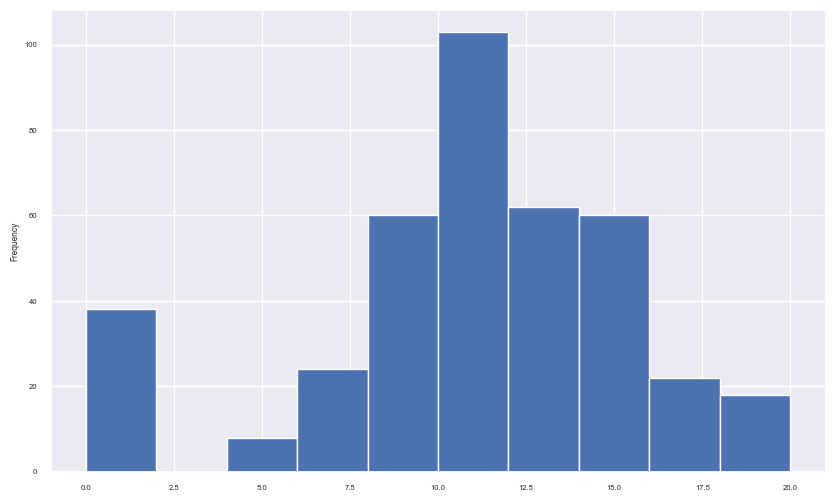

In [9]:
#Displaying the Histogram to analyze the frequency of values under the feature, G3
myData['G3'].plot(kind='hist', figsize = (10, 6))

In [10]:
#checking for any instances with null values
anyNull = pd.isnull(myData["G3"])
myData[anyNull]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='G1', ylabel='G3'>

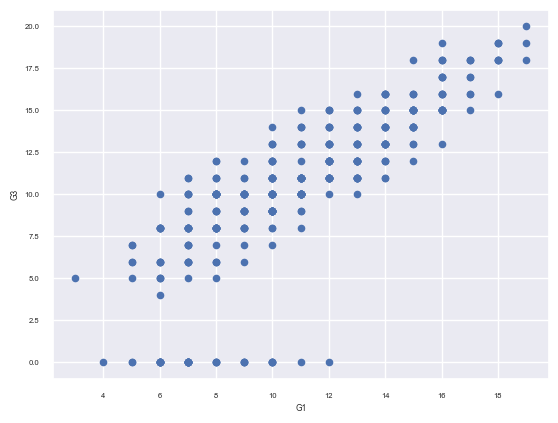

In [11]:
myData.plot(kind="scatter", x = "G1", y = "G3")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='G2', ylabel='G3'>

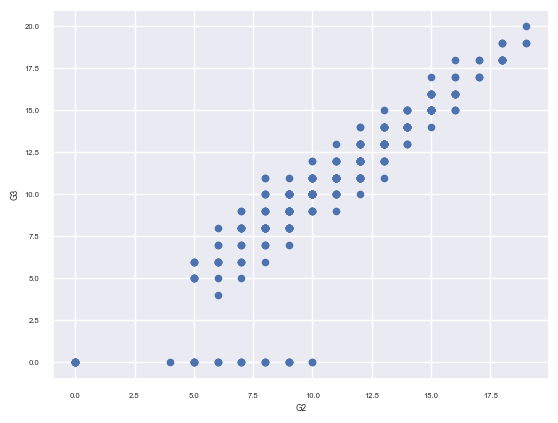

In [12]:
myData.plot(kind="scatter", x = "G2", y = "G3")

In [13]:
#Displaying the columns in the dataset
myData.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [14]:
#checking for any instances with null values
anyNull = pd.isnull(myData["G3"])
myData[anyNull]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


In [6]:
#selecting important attributes from the dataset according to correlation values
features = ['studytime', 'Fedu', 'Medu', 'absences', 'failures',  'G1', 'G2']
X = myData.loc[:, features]
#the target attribute has to be the final examination mark
Y = myData.loc[:, 'G3']

### Splitting the Data

In [7]:
#splitting the data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state = 0)
#splitting the data which is not for training into validation sets and test sets                                                    
x_val, x_fin, y_val, y_fin = train_test_split(x_test, y_test, test_size=0.5, random_state = 0)
#to display the proportions
x_train.shape, x_test.shape

((355, 7), (40, 7))

### Comparison of  models

In [44]:
# LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
myModell = LinearRegression()
myModell.fit(x_train, y_train)
predictedl = myModell.predict(x_val)
print(mean_absolute_error(y_val, predictedl))



1.2885525856469504


In [45]:
#DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
myModeld = DecisionTreeClassifier(random_state=1)
myModeld.fit(x_train, y_train)
predictedd = myModeld.predict(x_val)
print(mean_absolute_error(y_val, predictedd))

1.45


In [46]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
myModelk = KNeighborsRegressor(n_neighbors=3)
myModelk.fit(x_train, y_train)
predictedk = myModelk.predict(x_val)
print(mean_absolute_error(y_val, predictedk))

0.9333333333333332


In [47]:
#SVM
from sklearn.svm import SVR
myModel2 = SVR(kernel='rbf', C=1e3, gamma=0.1)
myModel2.fit(x_train, y_train)
predicted2 = myModel2.predict(x_val)
print(mean_absolute_error(y_val, predicted2))

1.5302315987390842


In [48]:
# RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
myModel1 = RandomForestClassifier(n_estimators = 150,
                                     max_depth = 4,
                                     class_weight = 'balanced')
myModel1.fit(x_train, y_train)
predicted = myModel1.predict(x_val)
print(mean_absolute_error(y_val, predicted))

1.4


### Hyperparameter tuning 

In [19]:
#Hyperparameter tuning the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#display the parameters of the model that can be tuned
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [20]:
#Specifying the range of values for some important hyperparameters
n_estimators_list = list(range(10, 220, 50))
criterion_list = ['gini', 'entropy']
max_depth_list = list(range(5, 41,10))
max_depth_list.append(None)
min_samples_split_list = [x/1000 for x in list(range(5, 41, 10))]
min_samples_leaf_list = [x/1000 for x in list(range(5, 41, 10))]
max_features_list = ['sqrt', 'log2']

#dictonary for the information used
params_grid = {
    'n_estimators': n_estimators_list,
    'criterion' : criterion_list,
    'max_depth' : max_depth_list,
    'min_samples_split' : min_samples_split_list,
    'min_samples_leaf' : min_samples_leaf_list,
    'max_features' : max_features_list
}

#number of possible combinations to be obtained
num_combinations = 1
for k in params_grid.keys(): num_combinations *= len(params_grid[k])
 
print("Number of Combinations = ", num_combinations)
params_grid


Number of Combinations =  1600


{'n_estimators': [10, 60, 110, 160, 210],
 'criterion': ['gini', 'entropy'],
 'max_depth': [5, 15, 25, 35, None],
 'min_samples_split': [0.005, 0.015, 0.025, 0.035],
 'min_samples_leaf': [0.005, 0.015, 0.025, 0.035],
 'max_features': ['sqrt', 'log2']}

In [21]:
#Using RandomizedSearchCV
#creating an intsance of the class RandomizedSearchCV
model_rf = RandomizedSearchCV(estimator = RandomForestClassifier(class_weight='balanced'),
                             param_distributions = params_grid,
                             n_iter = 24, 
                             cv=2,
                             return_train_score=True,
                             verbose = 2)
model_rf.fit(x_train, y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=0.015, min_samples_split=0.025, n_estimators=110; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=0.015, min_samples_split=0.025, n_estimators=110; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=0.025, min_samples_split=0.035, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=0.025, min_samples_split=0.035, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=0.015, min_samples_split=0.035, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=0.015, min_samples_split=0.035, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=0.025, min_samples_split=0.025, n_estimators=10; total

RandomizedSearchCV(cv=2,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_iter=24,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 15, 25, 35, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [0.005, 0.015,
                                                             0.025, 0.035],
                                        'min_samples_split': [0.005, 0.015,
                                                              0.025, 0.035],
                                        'n_estimators': [10, 60, 110, 160,
                                                         210]},
                   return_train_score=True, verbose=2)

In [22]:
model_rf.best_params_

{'n_estimators': 160,
 'min_samples_split': 0.005,
 'min_samples_leaf': 0.015,
 'max_features': 'log2',
 'max_depth': 15,
 'criterion': 'entropy'}

### Evaluating the tuned model with RandomizedSearchCV

In [23]:
myModel2 = RandomForestClassifier(
 n_estimators= 160,
 min_samples_split= 0.005,
 min_samples_leaf= 0.001,
 max_features= 'log2',
 max_depth= 55,
 criterion= 'gini'
)
myModel2.fit(x_train, y_train)
val_predictions2 = myModel2.predict(x_val)
print(mean_absolute_error(y_val, val_predictions2))

1.2


In [24]:
#Using GridSearchCV
n_estimators_list = [130, 160, 190]
criterion_list = ['gini']
max_depth_list = [35, 55]
min_samples_split_list = [0.001, 0.005]
min_samples_leaf_list = [0.001, 0.005]
max_features_list = ['log2']

params_grid = {
    'n_estimators': n_estimators_list,
    'criterion' : criterion_list,
    'max_depth' : max_depth_list,
    'min_samples_split' : min_samples_split_list,
    'min_samples_leaf' : min_samples_leaf_list,
    'max_features' : max_features_list
}

num_combinations = 1
for k in params_grid.keys(): num_combinations *= len(params_grid[k])
 
print("Number of Combinations = ", num_combinations)
params_grid


Number of Combinations =  24


{'n_estimators': [130, 160, 190],
 'criterion': ['gini'],
 'max_depth': [35, 55],
 'min_samples_split': [0.001, 0.005],
 'min_samples_leaf': [0.001, 0.005],
 'max_features': ['log2']}

In [25]:
model_rf2 = GridSearchCV(estimator = RandomForestClassifier(class_weight='balanced'),
                        param_grid = params_grid,
                        cv=2,
                        return_train_score=True,
                        verbose = 2)
model_rf2.fit(x_train, y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


[CV] END criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=130; total time=   0.4s
[CV] END criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=130; total time=   0.3s
[CV] END criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=160; total time=   0.4s
[CV] END criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=160; total time=   0.4s
[CV] END criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=190; total time=   0.5s
[CV] END criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=190; total time=   0.5s
[CV] END criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.005, n_estimators=130; total time=

GridSearchCV(cv=2, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini'], 'max_depth': [35, 55],
                         'max_features': ['log2'],
                         'min_samples_leaf': [0.001, 0.005],
                         'min_samples_split': [0.001, 0.005],
                         'n_estimators': [130, 160, 190]},
             return_train_score=True, verbose=2)

In [26]:
model_rf2.best_params_

{'criterion': 'gini',
 'max_depth': 55,
 'max_features': 'log2',
 'min_samples_leaf': 0.005,
 'min_samples_split': 0.001,
 'n_estimators': 160}

### Evaluating the tuned model with GridSearchCV

In [28]:
myModel2 = RandomForestClassifier(
 n_estimators= 190,
 min_samples_split= 0.005,
 min_samples_leaf= 0.001,
 max_features= 'log2',
 max_depth= 55,
 criterion= 'gini'
)
myModel2.fit(x_train, y_train)
val_predictions3 = myModel2.predict(x_val)
print(mean_absolute_error(y_val, val_predictions3))

1.15
